In [8]:
%pip install -U tensorflow-addons


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np 
import scipy.interpolate
import re
import matplotlib.pyplot as plt
import os

from imutils import paths
from PIL import ImageFile
import pandas as pd 
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
import os
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
num_classes = 2
input_shape = (224, 224, 3)

df = r"C:/Users/GB/Desktop/Taliqa/dataset/DS"
CATEGORIES =  ["Normal", "STONE"]

In [ ]:
# num_classes = 2
# input_shape = (224, 224, 3)

dataset_path = os.listdir('C:/Users/GB/Desktop/Taliqa/dataset/DS')


print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

NameError: name 'os' is not defined

In [ ]:
import pandas as pd 
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('C:/Users/GB/Desktop/Taliqa/dataset/DS/' + '/' +item)
 print(all_classes)

# Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    print(class_labels[:5])

NameError: name 'dataset_path' is not defined

In [ ]:
# # Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                   image
0  Normal     dataset_path/Normal/Normal- (1).jpg
1  Normal    dataset_path/Normal/Normal- (10).jpg
2  Normal   dataset_path/Normal/Normal- (100).jpg
3  Normal  dataset_path/Normal/Normal- (1000).jpg
4  Normal  dataset_path/Normal/Normal- (1001).jpg
     Labels                                image
9279  STONE  dataset_path/STONE/STONE- (995).jpg
9280  STONE  dataset_path/STONE/STONE- (996).jpg
9281  STONE  dataset_path/STONE/STONE- (997).jpg
9282  STONE  dataset_path/STONE/STONE- (998).jpg
9283  STONE  dataset_path/STONE/STONE- (999).jpg


In [ ]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  9284
Normal    5905
STONE     3379
Name: Labels, dtype: int64


In [ ]:
import os
import cv2
from PIL import Image
path = 'C:/Users/GB/Desktop/Taliqa/dataset/DS/'
dataset_path = os.listdir('C:/Users/GB/Desktop/Taliqa/dataset/DS/')

im_size = 224
images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        #patches = extract_patches_2d(img, patch_size(224, 224), max_patches = 10)
        #img = np.array(img)
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)

In [ ]:
print(images.shape)

(9284, 224, 224, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Normal' 'Normal' 'Normal' ... 'STONE' 'STONE' 'STONE']
[0 0 0 ... 1 1 1]


In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
Y=(Y-1)
len(Y)

9284

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=42)

In [ ]:
print(f"x_train shape: {train_x.shape} - y_train shape: {train_y.shape}")
print(f"x_test shape: {test_x.shape} - y_test shape: {test_y.shape}")

x_train shape: (7427, 224, 224, 3) - y_train shape: (7427, 2)
x_test shape: (1857, 224, 224, 3) - y_test shape: (1857, 2)


In [ ]:
BUFFER_SIZE = 224
BATCH_SIZE = 256

# AUGMENTATION
IMAGE_SIZE = 224
PATCH_SIZE = 64
NUM_PATCHES = (IMAGE_SIZE // PATCH_SIZE) ** 2

# OPTIMIZER
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001

# TRAINING
EPOCHS = 50

# ARCHITECTURE
LAYER_NORM_EPS = 1e-6
TRANSFORMER_LAYERS = 8
PROJECTION_DIM = 64
NUM_HEADS = 4
TRANSFORMER_UNITS = [
    PROJECTION_DIM * 2,
    PROJECTION_DIM,
]
MLP_HEAD_UNITS = [2048, 1024]

In [ ]:
from tensorflow import keras
data_augmentation =keras.Sequential(
    [
        keras.layers.Normalization(),
        keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(factor=0.02),
        keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(train_x)

# Implement Shifted Patch Tokenization

In [ ]:
class ShiftedPatchTokenization(keras.layers.Layer):
    def __init__(
        self,
        image_size=IMAGE_SIZE,
        patch_size=PATCH_SIZE,
        num_patches=NUM_PATCHES,
        projection_dim=PROJECTION_DIM,
        vanilla=False,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.vanilla = vanilla  # Flag to swtich to vanilla patch extractor
        self.image_size = image_size
        self.patch_size = patch_size
        self.half_patch = patch_size // 2
        self.flatten_patches = keras.layers.Reshape((num_patches, -1))
        self.projection = keras.layers.Dense(units=projection_dim)
        self.layer_norm = keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS)

    def crop_shift_pad(self, images, mode):
        # Build the diagonally shifted images
        if mode == "left-up":
            crop_height = self.half_patch
            crop_width = self.half_patch
            shift_height = 0
            shift_width = 0
        elif mode == "left-down":
            crop_height = 0
            crop_width = self.half_patch
            shift_height = self.half_patch
            shift_width = 0
        elif mode == "right-up":
            crop_height = self.half_patch
            crop_width = 0
            shift_height = 0
            shift_width = self.half_patch
        else:
            crop_height = 0
            crop_width = 0
            shift_height = self.half_patch
            shift_width = self.half_patch

        # Crop the shifted images and pad them
        crop = tf.image.crop_to_bounding_box(
            images,
            offset_height=crop_height,
            offset_width=crop_width,
            target_height=self.image_size - self.half_patch,
            target_width=self.image_size - self.half_patch,
        )
        shift_pad = tf.image.pad_to_bounding_box(
            crop,
            offset_height=shift_height,
            offset_width=shift_width,
            target_height=self.image_size,
            target_width=self.image_size,
        )
        return shift_pad

    def call(self, images):
        if not self.vanilla:
            # Concat the shifted images with the original image
            images = tf.concat(
                [
                    images,
                    self.crop_shift_pad(images, mode="left-up"),
                    self.crop_shift_pad(images, mode="left-down"),
                    self.crop_shift_pad(images, mode="right-up"),
                    self.crop_shift_pad(images, mode="right-down"),
                ],
                axis=-1,
            )
        # Patchify the images and flatten it
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        flat_patches = self.flatten_patches(patches)
        if not self.vanilla:
            # Layer normalize the flat patches and linearly project it
            tokens = self.layer_norm(flat_patches)
            tokens = self.projection(tokens)
        else:
            # Linearly project the flat patches
            tokens = self.projection(flat_patches)
        return (tokens, patches)

# Visualize the patches

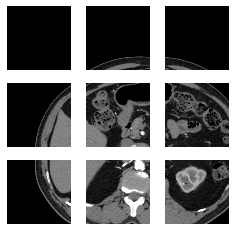

ORIGINAL


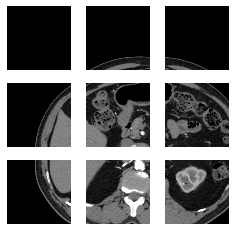

LEFT-UP


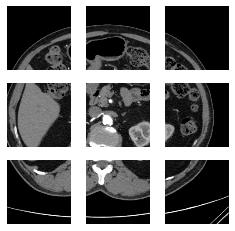

LEFT-DOWN


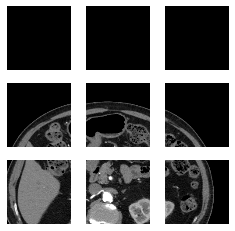

RIGHT-UP


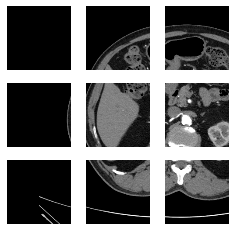

RIGHT-DOWN


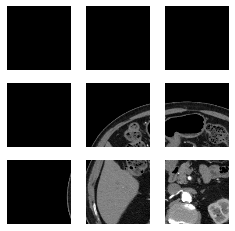

In [ ]:
# Get a random image from the training dataset
# and resize the image
image = train_x[np.random.choice(range(train_x.shape[0]))]
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(IMAGE_SIZE, IMAGE_SIZE)
)

# Vanilla patch maker: This takes an image and divides into
# patches as in the original ViT paper
(token, patch) = ShiftedPatchTokenization(vanilla=True)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
count = 1
plt.figure(figsize=(4, 4))
for row in range(n):
    for col in range(n):
        plt.subplot(n, n, count)
        count = count + 1
        image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 3))
        plt.imshow(image)
        plt.axis("off")
plt.show()

# Shifted Patch Tokenization: This layer takes the image, shifts it
# diagonally and then extracts patches from the concatinated images
(token, patch) = ShiftedPatchTokenization(vanilla=False)(resized_image / 255.0)
(token, patch) = (token[0], patch[0])
n = patch.shape[0]
shifted_images = ["ORIGINAL", "LEFT-UP", "LEFT-DOWN", "RIGHT-UP", "RIGHT-DOWN"]
for index, name in enumerate(shifted_images):
    print(name)
    count = 1
    plt.figure(figsize=(4, 4))
    for row in range(n):
        for col in range(n):
            plt.subplot(n, n, count)
            count = count + 1
            image = tf.reshape(patch[row][col], (PATCH_SIZE, PATCH_SIZE, 5 * 3))
            plt.imshow(image[..., 3 * index : 3 * index + 3])
            plt.axis("off")
    plt.show()

# Implement the patch encoding layer

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(
        self, num_patches=NUM_PATCHES, projection_dim=PROJECTION_DIM, **kwargs
    ):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
        self.positions = tf.range(start=0, limit=self.num_patches, delta=1)

    def call(self, encoded_patches):
        encoded_positions = self.position_embedding(self.positions)
        encoded_patches = encoded_patches + encoded_positions
        return encoded_patches

# Implement Locality Self Attention

In [ ]:
class MultiHeadAttentionLSA(tf.keras.layers.MultiHeadAttention):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        # The trainable temperature term. The initial value is
        # the square root of the key dimension.
        self.tau = tf.Variable(math.sqrt(float(self._key_dim)), trainable=True)

    def _compute_attention(self, query, key, value, attention_mask=None, training=None):
        query = tf.multiply(query, 1.0 / self.tau)
        attention_scores = tf.einsum(self._dot_product_equation, key, query)
        attention_scores = self._masked_softmax(attention_scores, attention_mask)
        attention_scores_dropout = self._dropout_layer(
            attention_scores, training=training
        )
        attention_output = tf.einsum(
            self._combine_equation, attention_scores_dropout, value
        )
        return attention_output, attention_scores

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Build the diagonal attention mask
diag_attn_mask = 1 - tf.eye(NUM_PATCHES)
diag_attn_mask = tf.cast([diag_attn_mask], dtype=tf.int8)

# Build the ViT

In [ ]:
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2
def create_vit_classifier(vanilla=False):
    inputs = layers.Input(shape=INPUT_SHAPE)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    (tokens, _) = ShiftedPatchTokenization(vanilla=vanilla)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder()(tokens)

    # Create multiple layers of the Transformer block.
    for _ in range(TRANSFORMER_LAYERS):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        if not vanilla:
            attention_output = MultiHeadAttentionLSA(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1, attention_mask=diag_attn_mask)
        else:
            attention_output = layers.MultiHeadAttention(
                num_heads=NUM_HEADS, key_dim=PROJECTION_DIM, dropout=0.1
            )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=TRANSFORMER_UNITS, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=MLP_HEAD_UNITS, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(NUM_CLASSES)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

# Compile, train, and evaluate the mode

In [ ]:
# Some code is taken from:
# https://www.kaggle.com/ashusma/training-rfcx-tensorflow-tpu-effnet-b2.
class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()

        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")

        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)

        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


def run_experiment(model):
    total_steps = int((len(train_x) / BATCH_SIZE) * EPOCHS)
    warmup_epoch_percentage = 0.10
    warmup_steps = int(total_steps * warmup_epoch_percentage)
    scheduled_lrs = WarmUpCosine(
        learning_rate_base=LEARNING_RATE,
        total_steps=total_steps,
        warmup_learning_rate=0.001,
        warmup_steps=warmup_steps,
    )

    optimizer = tfa.optimizers.AdamW(
        learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )    
    model.compile(
        optimizer=optimizer,
        #loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        #loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True)
        #loss=tf.keras.losses.Huber()
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=['accuracy']
            #keras.metrics.SparseCategoricalAccuracy(name="accuracy")
            #tf.keras.metrics.CategoricalAccuracy(h),
            #keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
     #   ]
    )
    checkpoint_path = "training_1/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

    history = model.fit(
        x=train_x,
        y=train_y,
        batch_size=BATCH_SIZE,
        epochs=100,
        validation_split=0.1,
    )


    return history


# Run experiments with the vanilla ViT
vit = create_vit_classifier(vanilla=True)
history = run_experiment(vit)

# Run experiments with the Shifted Patch Tokenization and
# Locality Self Attention modified ViT
#vit_sl = create_vit_classifier(vanilla=False)
#history = run_experiment(vit_sl)

Epoch 1/100
27/27 [==============================] - 67s 2s/step - loss: 2.4165 - accuracy: 0.5741 - val_loss: 0.2090 - val_accuracy: 0.7510
Epoch 2/100
27/27 [==============================] - 45s 2s/step - loss: 0.2860 - accuracy: 0.6587 - val_loss: 0.1863 - val_accuracy: 0.7604
Epoch 3/100
27/27 [==============================] - 46s 2s/step - loss: 0.2511 - accuracy: 0.6764 - val_loss: 0.1660 - val_accuracy: 0.7793
Epoch 4/100
27/27 [==============================] - 45s 2s/step - loss: 0.2366 - accuracy: 0.6991 - val_loss: 0.1664 - val_accuracy: 0.7820
Epoch 5/100
27/27 [==============================] - 45s 2s/step - loss: 0.2268 - accuracy: 0.7124 - val_loss: 0.1609 - val_accuracy: 0.7995
Epoch 6/100
27/27 [==============================] - 45s 2s/step - loss: 0.2168 - accuracy: 0.7208 - val_loss: 0.1697 - val_accuracy: 0.7981
Epoch 7/100
27/27 [==============================] - 45s 2s/step - loss: 0.2065 - accuracy: 0.7379 - val_loss: 0.1674 - val_accuracy: 0.8102
Epoch 8/100
2

Epoch 59/100
27/27 [==============================] - 47s 2s/step - loss: 0.0601 - accuracy: 0.9241 - val_loss: 0.0555 - val_accuracy: 0.9448
Epoch 60/100
27/27 [==============================] - 46s 2s/step - loss: 0.0585 - accuracy: 0.9258 - val_loss: 0.0575 - val_accuracy: 0.9435
Epoch 61/100
27/27 [==============================] - 46s 2s/step - loss: 0.0644 - accuracy: 0.9189 - val_loss: 0.0615 - val_accuracy: 0.9408
Epoch 62/100
27/27 [==============================] - 46s 2s/step - loss: 0.0604 - accuracy: 0.9232 - val_loss: 0.0511 - val_accuracy: 0.9542
Epoch 63/100
27/27 [==============================] - 51s 2s/step - loss: 0.0618 - accuracy: 0.9204 - val_loss: 0.0500 - val_accuracy: 0.9462
Epoch 64/100
27/27 [==============================] - 47s 2s/step - loss: 0.0583 - accuracy: 0.9255 - val_loss: 0.0520 - val_accuracy: 0.9502
Epoch 65/100
27/27 [==============================] - 47s 2s/step - loss: 0.0569 - accuracy: 0.9295 - val_loss: 0.0537 - val_accuracy: 0.9489
Epoch 

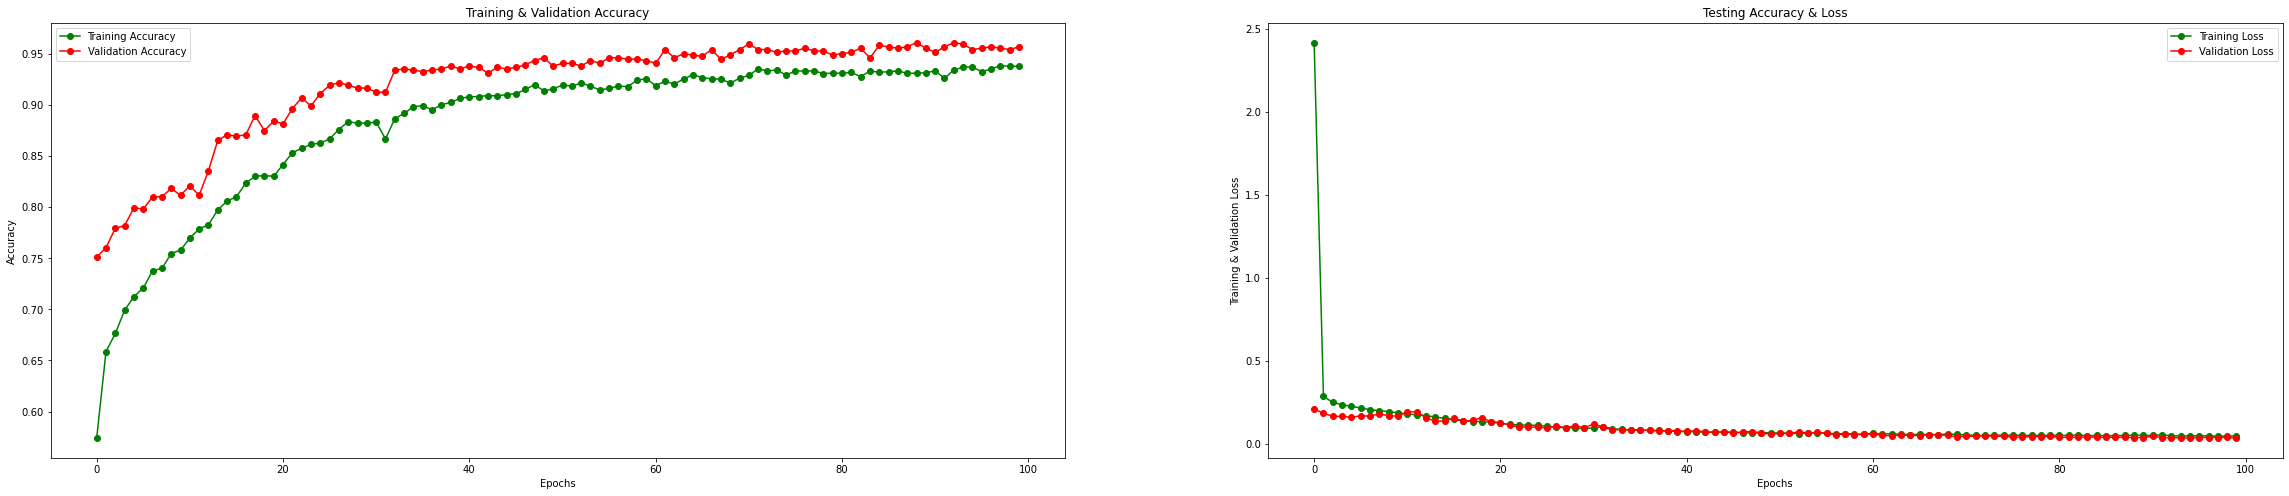

In [ ]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(40,8)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
y_pred=vit.predict(test_x)
y_pred=np.argmax(y_pred, axis=1)

59/59 [==============================] - 8s 107ms/step


In [ ]:
test_y=np.argmax(test_y, axis=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[1140   35]
 [  76  606]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1175
           1       0.95      0.89      0.92       682

    accuracy                           0.94      1857
   macro avg       0.94      0.93      0.93      1857
weighted avg       0.94      0.94      0.94      1857



Text(0.5, 1.0, 'Confusion Matrix')

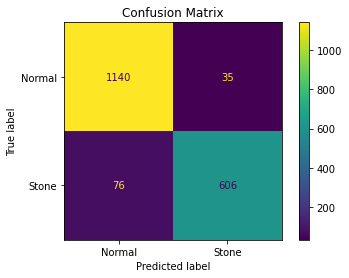

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm_LR=confusion_matrix(test_y, y_pred)
cmd = ConfusionMatrixDisplay(cm_LR, display_labels=['Normal' ,'Stone'])
cmd.plot()
plt.title('Confusion Matrix')

In [ ]:
print(create_vit_classifier)

<function create_vit_classifier at 0x00000209D725C9D0>


In [ ]:
vit.save('C:/Users/GB/Desktop/dataset/model')

INFO:tensorflow:Assets written to: C:/Users/GB/Desktop/dataset/model\assets


INFO:tensorflow:Assets written to: C:/Users/GB/Desktop/dataset/model\assets


In [ ]:
keras.models.load_model("C:/Users/GB/Desktop/dataset/model")

NameError: name 'keras' is not defined

In [ ]:
vit.save_weights('./checkpoints/my_checkpoint')

NameError: name 'vit' is not defined

In [ ]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [ ]:
ls "C:/Users/GB/Desktop/dataset/model"

 Volume in drive C has no label.
 Volume Serial Number is 48F6-B219

 Directory of C:\Users\GB\Desktop\dataset\model

05/08/2022  13:00    <DIR>          .
05/08/2022  13:00    <DIR>          ..
04/08/2022  09:57    <DIR>          assets
05/08/2022  13:00           143,839 keras_metadata.pb
05/08/2022  13:00         2,840,663 saved_model.pb
05/08/2022  13:00    <DIR>          variables
               2 File(s)      2,984,502 bytes
               4 Dir(s)  58,903,584,768 bytes free


In [ ]:
new_model = tf.keras.models.load_model('C:/Users/GB/Desktop/dataset/model/')

In [ ]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  7          ['input_1[0][0]']                
                                                                                                  
 shifted_patch_tokenization_2 (  ((None, 9, 64),     786496      ['data_augmentation[0][0]']      
 ShiftedPatchTokenization)       (None, 3, 3, 12288                                               
                                ))                                                            

                                                                                                  
 layer_normalization_9 (LayerNo  (None, 9, 64)       128         ['add_5[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 9, 64)       66368       ['layer_normalization_9[0][0]',  
 eadAttention)                                                    'layer_normalization_9[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 9, 64)        0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_nor

                                                                                                  
 dropout_12 (Dropout)           (None, 9, 128)       0           ['dense_15[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, 9, 64)        8256        ['dropout_12[0][0]']             
                                                                                                  
 dropout_13 (Dropout)           (None, 9, 64)        0           ['dense_16[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 9, 64)        0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_nor

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_x, test_y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_x).shape)

59/59 - 7s - loss: 1.3394 - accuracy: 0.6548 - 7s/epoch - 122ms/step
Restored model, accuracy: 65.48%
59/59 [==============================] - 7s 89ms/step
(1857, 2)


In [ ]:
os.listdir("C:/Users/GB/Desktop/dataset/model")



['assets', 'keras_metadata.pb', 'saved_model.pb', 'variables']

In [ ]:
# Save the weights
vit.save_weights('./checkpoints/my_checkpoint')



# Restore the weights
vit.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = vit.evaluate(test_x, test_y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

59/59 - 7s - loss: 1.3394 - accuracy: 0.6548 - 7s/epoch - 117ms/step
Restored model, accuracy: 65.48%


In [ ]:
!mkdir -p saved_model
vit.save('saved_model/this_model')

NameError: name 'vit' is not defined

In [ ]:
import cv2

prediction = vit.predict({'input': test_image })

NameError: name 'vit' is not defined